In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('train_5CLrC8b/train.csv')

In [5]:
df.fillna(0,inplace=True,axis=0)

In [6]:
dte = pd.to_datetime(df['checkin_date'],dayfirst=True)
dte1 = pd.to_datetime(df['checkout_date'],dayfirst=True)
dte2 = pd.to_datetime(df['booking_date'],dayfirst=True)

In [7]:
year = dte.apply(lambda x : x.year)
month = dte.apply(lambda x : x.month)
day = dte.apply(lambda x : x.day)
year_1 = dte1.apply(lambda x : x.year)
month_1 = dte1.apply(lambda x : x.month)
day_1 = dte1.apply(lambda x : x.day)

year_2 = dte2.apply(lambda x : x.year)
month_2 = dte2.apply(lambda x : x.month)
day_2 = dte2.apply(lambda x : x.day)

df['month']=month
df['year'] = year
df['day'] = day

df['month_1']=month_1
df['year_1'] = year_1
df['day_1'] = day_1


df['month_2']=month_2
df['year_2'] = year_2
df['day_2'] = day_2


In [14]:
df.drop(['checkout_date','checkin_date','booking_date','memberid','reservation_id',
        ],inplace=True,axis=1)

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd 

In [9]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [10]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [11]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [16]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# train.csv has 233154 rows in reality, but we are only loading/previewing the first 1000 rows
df2 = df#pd.read_csv('train_5CLrC8b/train.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'train.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 341424 rows and 28 columns


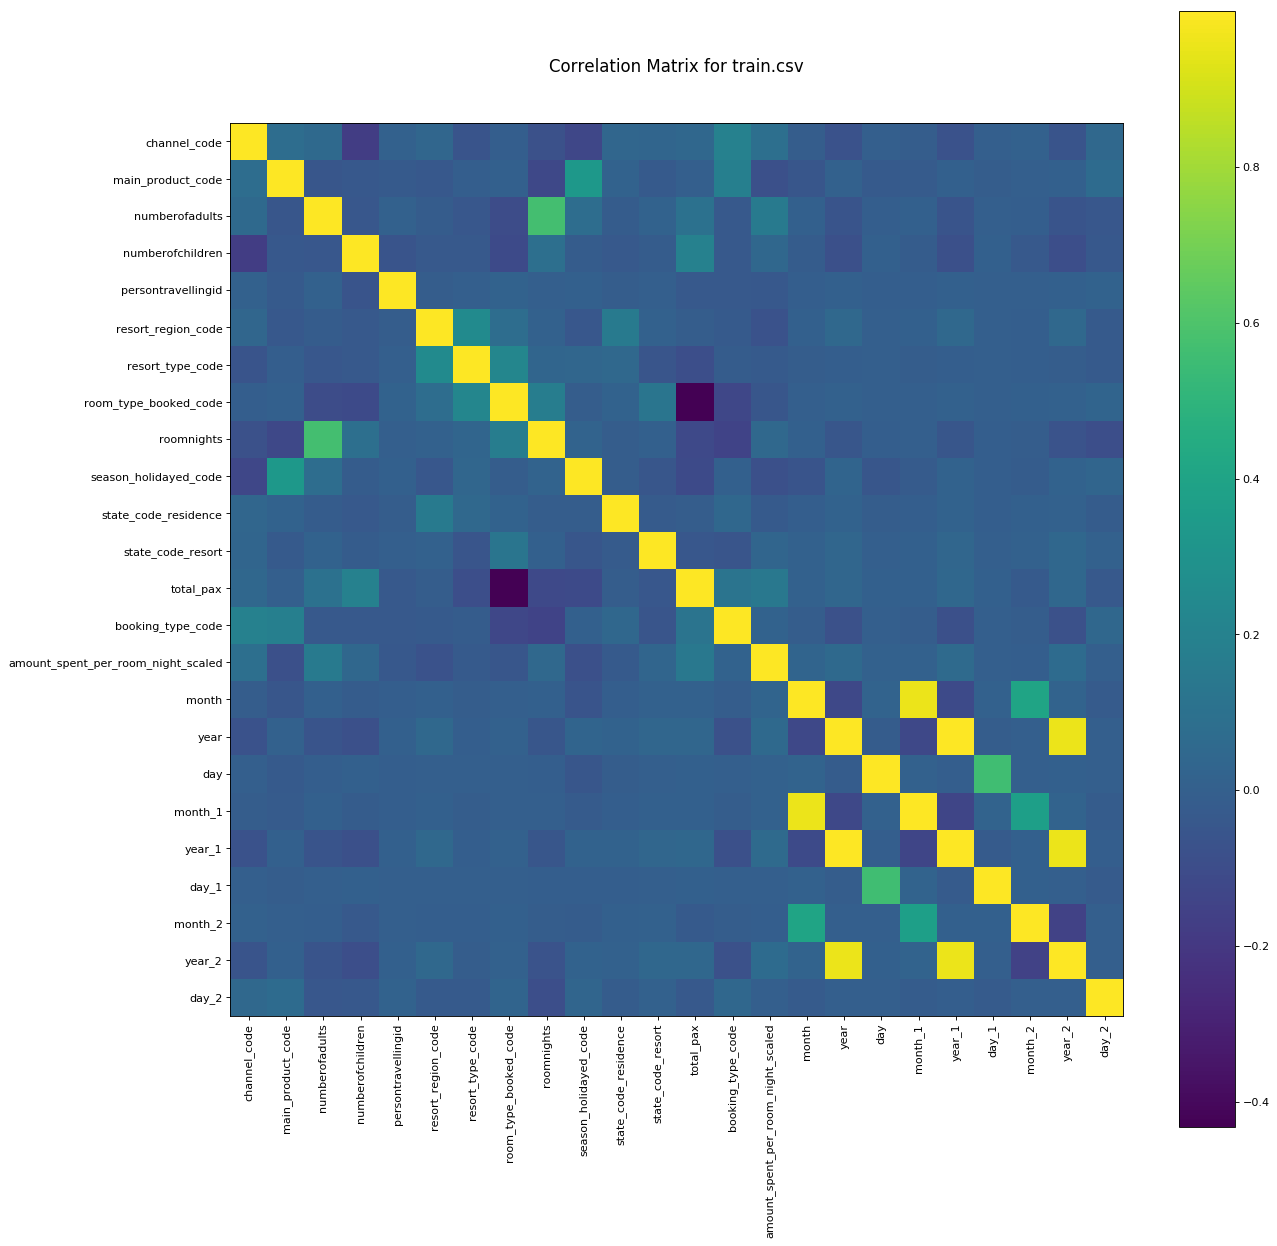

In [18]:
plotCorrelationMatrix(df2, 18)

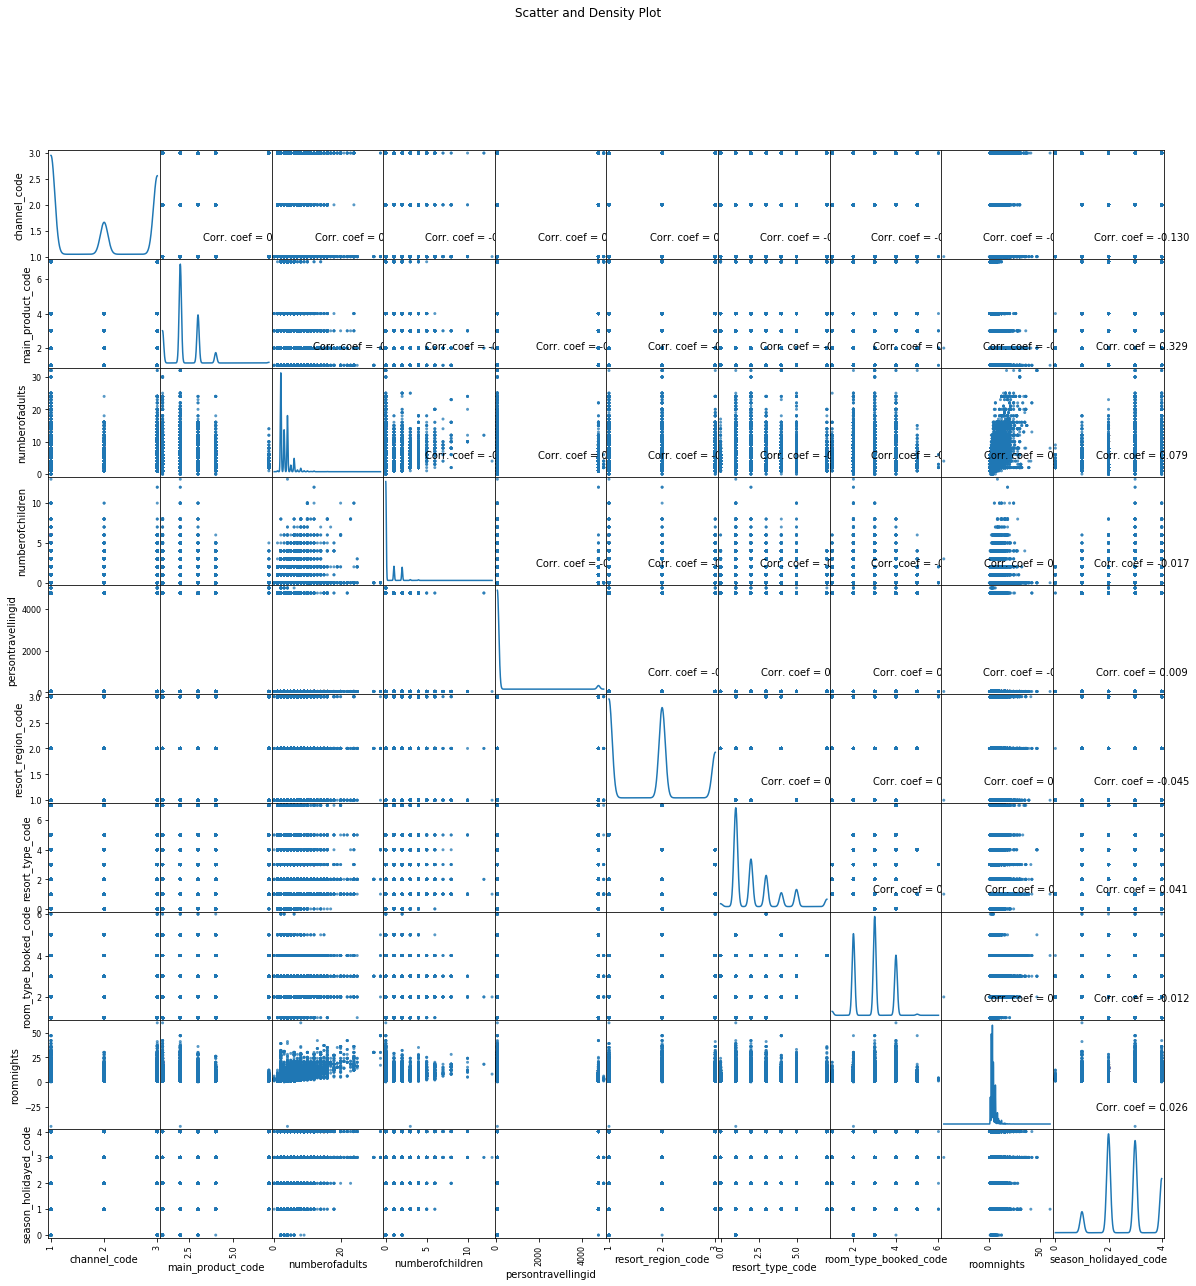

In [20]:
plotScatterMatrix(df2, 20, 10)